In [138]:
# Import pandas for data manipulation and analysis
import pandas as pd
# Import numpy for numerical computations and random number generation
import numpy as np
# Import matplotlib.pyplot for basic plotting and visualization
import matplotlib.pyplot as plt
# Import seaborn for advanced statistical visualizations
import seaborn as sns



In [139]:
# Read the CSV file 'metrics_decline_data.csv' into a pandas DataFrame called 'data'
data = pd.read_csv('metrics_decline_data.csv')

# Display the first 5 rows of the DataFrame to quickly inspect the structure and sample values
data.head()

,Date,Device,Region,VisitorType,AddToCart,Checkout,PaymentSuccess,Revenue
0,2023-04-13,Mobile,Latin America,Returning_Visitor,True,True,True,26.176832
1,2024-03-11,Mobile,Europe,Returning_Visitor,True,True,True,45.758516
2,2023-09-28,Mobile,Asia,New_Visitor,True,True,False,0.000000
3,2023-04-17,Desktop,Latin America,Returning_Visitor,False,False,False,0.000000
4,2023-03-13,Mobile,Latin America,Returning_Visitor,True,True,True,125.179035


In [140]:
data.columns

Index(['Date', 'Device', 'Region', 'VisitorType', 'AddToCart', 'Checkout',
       'PaymentSuccess', 'Revenue'],
      dtype='object')

Device:
Indicates the type of device the user was using during the session. Typically, this is either "Mobile" or "Desktop".

Region:
Represents the geographical region of the user. This might be labeled as "Europe", "North America", "Asia", "Latin America", etc., and is used to segment data by location.

VisitorType:
Specifies whether the user is a new visitor or a returning visitor. This helps in understanding differences in behavior between first-time users and those who have visited before.

AddToCart:
A boolean flag that indicates if the user added an item to their shopping cart during the session. This is the first step in the conversion funnel.

Checkout:
A boolean flag that shows whether the user proceeded from adding an item to the cart to initiating the checkout process.

PaymentSuccess:
A boolean flag that indicates whether the payment process was successfully completed. This is typically the final step in the conversion funnel.

Revenue:
A continuous value representing the amount of money generated from the session. If the payment was successful, this value is usually a number within a set range (e.g., $20 to $200); if not, it’s zero.

Year:
The year part of the session's date, extracted for time-based analysis and segmentation.

Month:
The month part of the session's date, which can be used to study seasonal trends or patterns.

Day:
The day of the month from the session's date, useful for more granular time analysis.

Conversion:
A binary indicator (0 or 1) showing whether the session resulted in a conversion (typically defined as having a revenue greater than 0). This is useful for calculating overall conversion rates.

In [141]:
#Identify columns with object or category types
cat_vars = list(data.select_dtypes(include=['object', 'category']).columns)

# Step 2: Include boolean columns (if you want them as categorical)
bool_vars = list(data.select_dtypes(include=['bool']).columns)
cat_vars.extend(bool_vars)

# Step 3: Check numeric columns that might be categorical based on unique values
# For example, if a numeric column has fewer than 20 unique values, consider it categorical.
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if data[col].nunique() < 20:
        cat_vars.append(col)

# Remove duplicates (if any) and sort for clarity
cat_vars = sorted(set(cat_vars))
print("Categorical variables:", cat_vars)

Categorical variables: ['AddToCart', 'Checkout', 'Date', 'Device', 'PaymentSuccess', 'Region', 'VisitorType']


In [142]:
# Identify all numeric columns
num_vars = list(data.select_dtypes(include=['int64', 'float64']).columns)

# Remove those that are already in our categorical variables list
num_vars = [col for col in num_vars if col not in cat_vars]

print("Numerical variables:", num_vars)

Numerical variables: ['Revenue']


In [143]:
# Get an overview of the dataset (structure, data types, and non-null counts)
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5000 non-null   object 
 1   Device          5000 non-null   object 
 2   Region          5000 non-null   object 
 3   VisitorType     5000 non-null   object 
 4   AddToCart       5000 non-null   bool   
 5   Checkout        5000 non-null   bool   
 6   PaymentSuccess  5000 non-null   bool   
 7   Revenue         5000 non-null   float64
dtypes: bool(3), float64(1), object(4)
memory usage: 210.1+ KB
None


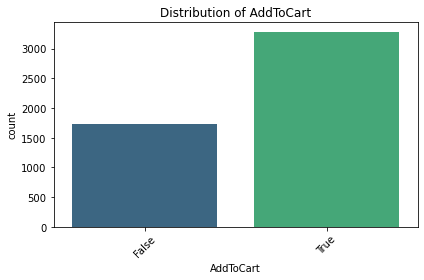

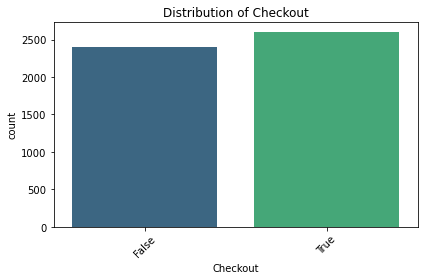

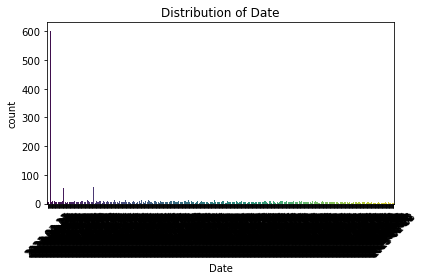

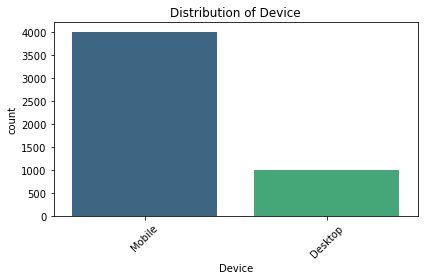

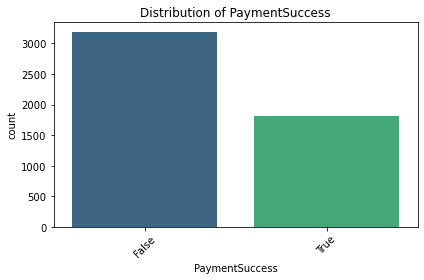

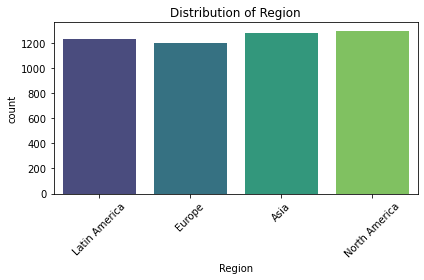

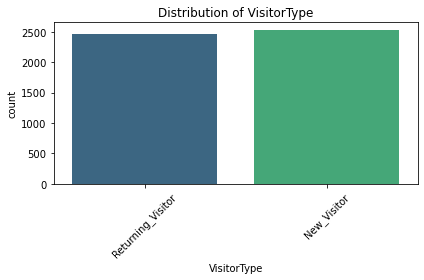

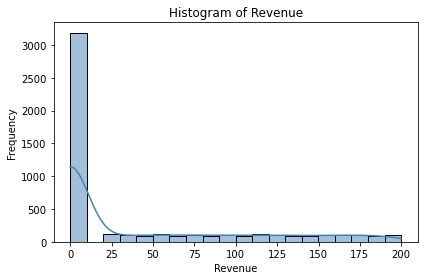

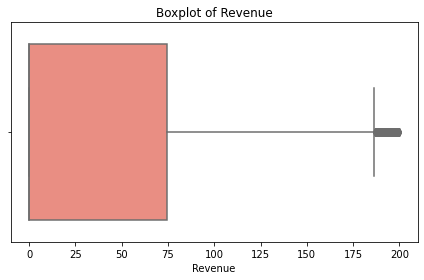

In [144]:
# -------------------------
# 1. Distributions for Categorical Variables
# -------------------------
# Loop over each variable in the list of categorical variables (cat_vars)
for var in cat_vars:
    # Create a new figure with a fixed size for each variable
    plt.figure(figsize=(6,4))
    # Create a count plot using seaborn for the categorical variable.
    # This shows the frequency (i.e., count) of each unique category.
    sns.countplot(data=data, x=var, palette='viridis')
    # Set the plot title to indicate which variable is being visualized.
    plt.title(f"Distribution of {var}")
    # Rotate the x-axis labels by 45 degrees for better readability.
    plt.xticks(rotation=45)
    # Adjust the layout so that nothing overlaps.
    plt.tight_layout()
    # Display the plot.
    plt.show()

# -------------------------
# 2. Distributions for Numerical Variables
# -------------------------

# Histograms for numerical variables (with a Kernel Density Estimate for a smoother curve)
for var in num_vars:
    # Create a new figure for each numerical variable.
    plt.figure(figsize=(6,4))
    # Use seaborn's histplot to plot the histogram of the variable.
    # 'bins=20' sets the number of bins, and 'kde=True' overlays a KDE curve.
    sns.histplot(data[var], bins=20, kde=True, color='steelblue')
    # Set the plot title to indicate which numerical variable is visualized.
    plt.title(f"Histogram of {var}")
    # Label the x-axis with the variable name.
    plt.xlabel(var)
    # Label the y-axis as "Frequency" to indicate the count of observations.
    plt.ylabel("Frequency")
    # Adjust the layout for a neat appearance.
    plt.tight_layout()
    # Display the plot.
    plt.show()

# Boxplots for numerical variables (to identify outliers and get a sense of the distribution's spread)
for var in num_vars:
    # Create a new figure for each boxplot.
    plt.figure(figsize=(6,4))
    # Use seaborn's boxplot to visualize the distribution.
    # The boxplot shows the median, quartiles, and potential outliers.
    sns.boxplot(x=data[var], color='salmon')
    # Set the plot title.
    plt.title(f"Boxplot of {var}")
    # Adjust layout to prevent overlap.
    plt.tight_layout()
    # Display the plot.
    plt.show()


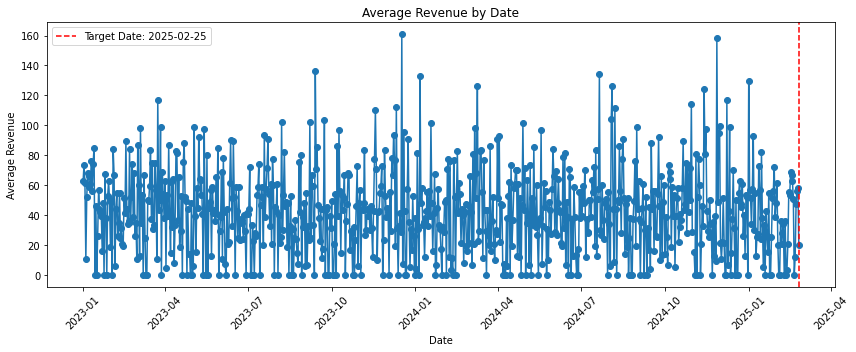

Target Date Revenue: $20.24
Average Revenue for Tuesday (excluding target date): $33.38


In [145]:

# Ensure 'Date' is in datetime format and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Aggregate average revenue per day
daily_revenue = data['Revenue'].resample('D').mean().reset_index()

# yesterday
target_date = pd.Timestamp("2025-02-25")  # Fixed date from our data generation

# Visualize the daily average revenue over time
plt.figure(figsize=(12, 5))
plt.plot(daily_revenue['Date'], daily_revenue['Revenue'], marker='o', linestyle='-')
plt.axvline(target_date, color='red', linestyle='--', label=f'Target Date: {target_date.date()}')
plt.title("Average Revenue by Date")
plt.xlabel("Date")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Compare target date revenue to historical average (e.g., same day-of-week)
# Let's extract the revenue for the target day and the same weekday for all weeks
target_weekday = target_date.dayofweek
daily_revenue['Weekday'] = daily_revenue['Date'].dt.dayofweek

# Exclude the target date for computing the baseline average
baseline_revenue = daily_revenue[daily_revenue['Date'] != target_date]
avg_baseline = baseline_revenue[baseline_revenue['Weekday'] == target_weekday]['Revenue'].mean()

target_revenue = daily_revenue[daily_revenue['Date'] == target_date]['Revenue'].values[0]
print(f"Target Date Revenue: ${target_revenue:.2f}")
print(f"Average Revenue for {target_date.strftime('%A')} (excluding target date): ${avg_baseline:.2f}")

Average Revenue on February 25 by Year:
   Year    Revenue
0  2023  38.655379
1  2024  47.383516
2  2025  20.237566


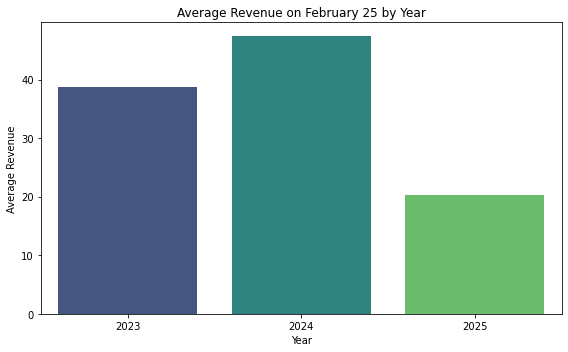


Revenue on target date 2025-02-25: $20.24
Average revenue on Tuesday (excluding target date): $33.38


In [105]:
# Create additional columns for Year, Month, and Day for seasonal analysis
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

# Filter data for the same month and day (i.e., the same date) across different years.
# This assumes your dataset spans multiple years.
seasonal_data = data[(data['Month'] == target_date.month) & (data['Day'] == target_date.day)]

# Compute the average revenue on that date for each year
seasonal_avg = seasonal_data.groupby('Year')['Revenue'].mean().reset_index()

print("Average Revenue on", target_date.strftime("%B %d"), "by Year:")
print(seasonal_avg)

# Visualize the seasonal revenue trend for the target date across years
plt.figure(figsize=(8,5))
sns.barplot(x='Year', y='Revenue', data=seasonal_avg, palette='viridis')
plt.title(f"Average Revenue on {target_date.strftime('%B %d')} by Year")
plt.ylabel("Average Revenue")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# Additional week-day comparison
daily_revenue = data['Revenue'].resample('D').mean().reset_index()
target_weekday = target_date.dayofweek
daily_revenue['Weekday'] = daily_revenue['Date'].dt.dayofweek

baseline_weekday_revenue = daily_revenue[daily_revenue['Weekday'] == target_weekday]

# Use baseline_weekday_revenue's 'Date' column for the mask
avg_baseline_weekday = baseline_weekday_revenue[baseline_weekday_revenue['Date'] != target_date]['Revenue'].mean()

target_revenue = daily_revenue[daily_revenue['Date'] == target_date]['Revenue'].values[0]

print(f"\nRevenue on target date {target_date.date()}: ${target_revenue:.2f}")
print(f"Average revenue on {target_date.strftime('%A')} (excluding target date): ${avg_baseline_weekday:.2f}")


In [106]:
# Get the maximum date in the dataset
max_date = daily_revenue['Date'].max()

# Define the start date for the past week (last 7 days)
one_week_ago = max_date - pd.Timedelta(days=7)

# Filter the data to only include the past week
last_week_data = daily_revenue[(daily_revenue['Date'] > one_week_ago) & (daily_revenue['Date'] <= max_date)]

# Calculate the average daily revenue for this period
avg_last_week_revenue = last_week_data['Revenue'].mean()

print(f"Average daily revenue for the past week (from {one_week_ago.date()} to {max_date.date()}): ${avg_last_week_revenue:.2f}")


Average daily revenue for the past week (from 2025-02-18 to 2025-02-25): $34.98


In [107]:
# Create a binary conversion column
data['Conversion'] = (data['Revenue'] > 0).astype(int)
# Define the target date of interest (the day with the revenue drop)
target_date = pd.Timestamp("2025-02-25")

# Filter the data to only include sessions from the target date
target_data = data.loc[target_date].copy()


In [108]:
# Group by VisitorType and compute conversion rate, average revenue, and AOV
target_day_visitor_summary = target_data.groupby('VisitorType').agg(
    ConversionRate=('Conversion', 'mean'),  # average of 0/1 gives % converting
    AvgRevenue=('Revenue', 'mean')      # average revenue across all sessions

).reset_index()

print("\nVisitorType Summary:")
target_day_visitor_summary


VisitorType Summary:


,VisitorType,ConversionRate,AvgRevenue
0,New_Visitor,0.198718,23.398751
1,Returning_Visitor,0.152249,16.824800


In [110]:
# Group by VisitorType and compute conversion rate, average revenue, and AOV
whole_data_visitor_summary = data.groupby('VisitorType').agg(
    ConversionRate=('Conversion', 'mean'),  # average of 0/1 gives % converting
    AvgRevenue=('Revenue', 'mean')      # average revenue across all sessions

).reset_index()

print("\nVisitorType Summary:")
whole_data_visitor_summary


VisitorType Summary:


,VisitorType,ConversionRate,AvgRevenue
0,New_Visitor,0.372332,41.752605
1,Returning_Visitor,0.353441,37.344273


In [113]:
target_day_region_summary = target_data.groupby('Region').agg(
    ConversionRate=('Conversion', 'mean'),
    AvgRevenue=('Revenue', 'mean')

).reset_index()

print("\nRegion Summary:")
target_day_region_summary


Region Summary:


,Region,ConversionRate,AvgRevenue
0,Asia,0.418182,50.462749
1,Europe,0.076372,8.626248
2,Latin America,0.400000,45.127240
3,North America,0.403509,45.860027


In [114]:
region_summary_full_data = data.groupby('Region').agg(
    ConversionRate=('Conversion', 'mean'),
    AvgRevenue=('Revenue', 'mean')

).reset_index()

print("\nRegion Summary:")
region_summary_full_data


Region Summary:


,Region,ConversionRate,AvgRevenue
0,Asia,0.387451,42.699437
1,Europe,0.300501,32.611968
2,Latin America,0.389431,41.974343
3,North America,0.371627,40.659278


In [115]:
# Group by Device to calculate key metrics
device_summary_target_day = target_data.groupby('Device').agg(
    ConversionRate=('Conversion', 'mean'),  # Mean of 0/1 gives percentage converting
    AvgRevenue=('Revenue', 'mean')
).reset_index()

print("\nDevice Summary:")
device_summary_target_day


Device Summary:


,Device,ConversionRate,AvgRevenue
0,Desktop,0.442623,47.594390
1,Mobile,0.146296,17.147258


In [116]:
# Group by Device to calculate key metrics
device_summary_whole_data = data.groupby('Device').agg(
    ConversionRate=('Conversion', 'mean'),  # Mean of 0/1 gives percentage converting
    AvgRevenue=('Revenue', 'mean')
).reset_index()

print("\nDevice Summary:")
device_summary_whole_data


Device Summary:


,Device,ConversionRate,AvgRevenue
0,Desktop,0.386158,41.194504
1,Mobile,0.357232,39.171503


In [117]:
# 1. Segmentation by Device and Region
device_region_summary_target = target_data.groupby(['Device', 'Region']).agg(
    ConversionRate=('Conversion', 'mean'),
    AvgRevenue=('Revenue', 'mean')

).reset_index()

print("Segmented Summary by Device and Region:")
device_region_summary_target

Segmented Summary by Device and Region:


,Device,Region,ConversionRate,AvgRevenue
0,Desktop,Asia,0.533333,62.436187
1,Desktop,Europe,0.363636,49.674618
2,Desktop,Latin America,0.388889,30.002155
3,Desktop,North America,0.470588,51.779729
4,Mobile,Asia,0.375000,45.972710
5,Mobile,Europe,0.068627,7.519552
6,Mobile,Latin America,0.403846,50.362846
7,Mobile,North America,0.375000,43.344153


In [118]:
# 1. Segmentation by Device and Region
device_region_summary_whole_data = data.groupby(['Device', 'Region']).agg(
    ConversionRate=('Conversion', 'mean'),
    AvgRevenue=('Revenue', 'mean')

).reset_index()

print("Segmented Summary by Device and Region:")
device_region_summary_whole_data

Segmented Summary by Device and Region:


,Device,Region,ConversionRate,AvgRevenue
0,Desktop,Asia,0.368217,38.900231
1,Desktop,Europe,0.385593,42.967118
2,Desktop,Latin America,0.401674,42.531533
3,Desktop,North America,0.390152,40.641610
4,Mobile,Asia,0.392330,43.663248
5,Mobile,Europe,0.279626,30.071619
6,Mobile,Latin America,0.386478,41.839966
7,Mobile,North America,0.366893,40.663793


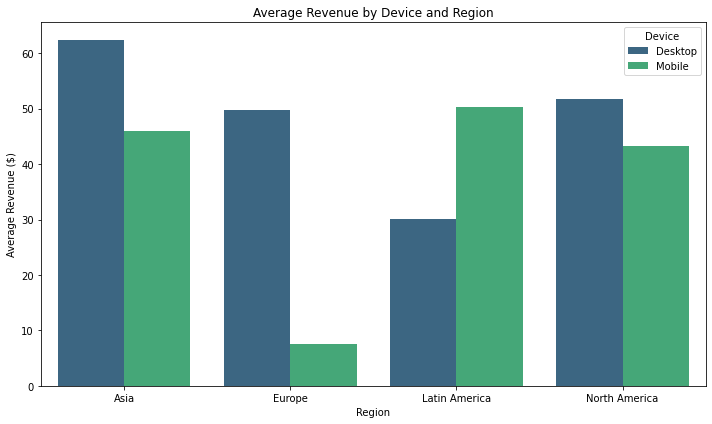

In [119]:
# Visualize Average Revenue by Device and Region
plt.figure(figsize=(10, 6))
sns.barplot(data=device_region_summary_target, x='Region', y='AvgRevenue', hue='Device', palette='viridis')
plt.title("Average Revenue by Device and Region")
plt.ylabel("Average Revenue ($)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

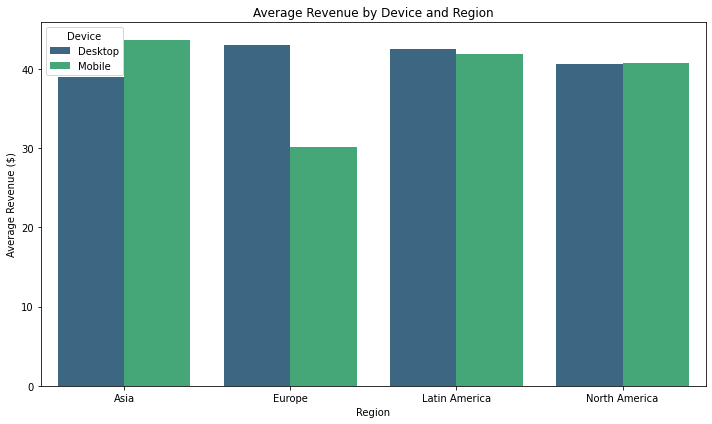

In [120]:
# Visualize Average Revenue by Device and Region
plt.figure(figsize=(10, 6))
sns.barplot(data=device_region_summary_whole_data, x='Region', y='AvgRevenue', hue='Device', palette='viridis')
plt.title("Average Revenue by Device and Region")
plt.ylabel("Average Revenue ($)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

In [121]:
device_visitor_summary = data.groupby(['Device', 'VisitorType']).agg(
    TotalSessions=('Conversion', 'count'),
    ConversionRate=('Conversion', 'mean'),
    AvgRevenue=('Revenue', 'mean')
).reset_index()

print("Segmented Summary by Device and VisitorType:")
device_visitor_summary

Segmented Summary by Device and VisitorType:


,Device,VisitorType,TotalSessions,ConversionRate,AvgRevenue
0,Desktop,New_Visitor,518,0.378378,41.078868
1,Desktop,Returning_Visitor,479,0.394572,41.319556
2,Mobile,New_Visitor,2012,0.370775,41.926063
3,Mobile,Returning_Visitor,1991,0.343546,36.387889


In [123]:
# target day overall rates
target_data_overall_conversion_rate = target_data['Conversion'].mean()  # Percentage of sessions with revenue > 0
target_data_overall_avg_revenue = target_data['Revenue'].mean()         # Average revenue per session (monetary value)
target_data_overall_addtocart_rate = target_data['AddToCart'].mean()
target_data_overall_checkout_rate = target_data['Checkout'].mean()
target_data_overall_payment_success_rate = target_data['PaymentSuccess'].mean()

print(f"Overall Conversion Rate: {target_data_overall_conversion_rate:.2%}")
print(f"Overall Average Revenue: ${target_data_overall_avg_revenue:.2f}")
print(f"Overall Add-to-Cart Rate: {target_data_overall_addtocart_rate:.2%}")
print(f"Overall Checkout Rate: {target_data_overall_checkout_rate:.2%}")
print(f"Overall Payment Success Rate: {target_data_overall_payment_success_rate:.2%}")

Overall Conversion Rate: 17.64%
Overall Average Revenue: $20.24
Overall Add-to-Cart Rate: 31.95%
Overall Checkout Rate: 26.46%
Overall Payment Success Rate: 17.64%


In [122]:
# Compute overall rates
overall_conversion_rate = data['Conversion'].mean()  # Percentage of sessions with revenue > 0
overall_avg_revenue = data['Revenue'].mean()         # Average revenue per session (monetary value)
overall_addtocart_rate = data['AddToCart'].mean()
overall_checkout_rate = data['Checkout'].mean()
overall_payment_success_rate = data['PaymentSuccess'].mean()

print(f"Overall Conversion Rate: {overall_conversion_rate:.2%}")
print(f"Overall Average Revenue: ${overall_avg_revenue:.2f}")
print(f"Overall Add-to-Cart Rate: {overall_addtocart_rate:.2%}")
print(f"Overall Checkout Rate: {overall_checkout_rate:.2%}")
print(f"Overall Payment Success Rate: {overall_payment_success_rate:.2%}")

Overall Conversion Rate: 36.30%
Overall Average Revenue: $39.57
Overall Add-to-Cart Rate: 65.54%
Overall Checkout Rate: 51.98%
Overall Payment Success Rate: 36.30%


In [124]:
# ------------------------------------------------
# Step 5: Segment the Data Using Dimensions and Measures
# ------------------------------------------------

# Example segmentation by Device (Mobile vs. Desktop)
device_funnel = data.groupby('Device').agg(
    TotalSessions=('Revenue', 'count'),
    AddToCart=('AddToCart', 'sum'),
    Checkout=('Checkout', 'sum'),
    PaymentSuccess=('PaymentSuccess', 'sum')
)

device_funnel["AddToCart Rate"] = device_funnel["AddToCart"] / device_funnel["TotalSessions"]
device_funnel["Checkout Rate (from AddToCart)"] = device_funnel["Checkout"] / device_funnel["AddToCart"]
device_funnel["Payment Success Rate (from Checkout)"] = device_funnel["PaymentSuccess"] / device_funnel["Checkout"]

print("\nConversion Funnel by Device:")
device_funnel


Conversion Funnel by Device:


,TotalSessions,AddToCart,Checkout,PaymentSuccess,AddToCart Rate,Checkout Rate (from AddToCart),Payment Success Rate (from Checkout)
Device,,,,,,,
Desktop,997,706,559,385,0.708124,0.791785,0.68873
Mobile,4003,2571,2040,1430,0.642268,0.793466,0.70098


In [125]:
# ------------------------------------------------
# Step 5: Segment the Data Using Dimensions and Measures
# ------------------------------------------------

# Example segmentation by Device (Mobile vs. Desktop)
target_data_device_funnel = target_data.groupby('Device').agg(
    TotalSessions=('Revenue', 'count'),
    AddToCart=('AddToCart', 'sum'),
    Checkout=('Checkout', 'sum'),
    PaymentSuccess=('PaymentSuccess', 'sum')
)

target_data_device_funnel["AddToCart Rate"] = target_data_device_funnel["AddToCart"] / target_data_device_funnel["TotalSessions"]
target_data_device_funnel["Checkout Rate (from AddToCart)"] = target_data_device_funnel["Checkout"] / target_data_device_funnel["AddToCart"]
target_data_device_funnel["Payment Success Rate (from Checkout)"] = target_data_device_funnel["PaymentSuccess"] / target_data_device_funnel["Checkout"]

print("\nConversion Funnel by Device for Target Day:")
target_data_device_funnel



Conversion Funnel by Device for Target Day:


,TotalSessions,AddToCart,Checkout,PaymentSuccess,AddToCart Rate,Checkout Rate (from AddToCart),Payment Success Rate (from Checkout)
Device,,,,,,,
Desktop,61,44,39,27,0.721311,0.886364,0.692308
Mobile,540,148,120,79,0.274074,0.810811,0.658333


In [126]:

# 2. Further filter to Europe only
target_data_eu = target_data[target_data['Region'] == 'Europe']

# 3. Group by 'Device' (Mobile vs. Desktop) and compute funnel metrics
eu_device_funnel = target_data_eu.groupby('Device').agg(
    TotalSessions=('AddToCart', 'count'),   # or you could use 'Revenue' or any column for the count
    AddToCart=('AddToCart', 'sum'),
    Checkout=('Checkout', 'sum'),
    PaymentSuccess=('PaymentSuccess', 'sum')
).reset_index()

# 4. Compute funnel rates
eu_device_funnel["AddToCart Rate"] = (
    eu_device_funnel["AddToCart"] / eu_device_funnel["TotalSessions"]
)
eu_device_funnel["Checkout Rate (from AddToCart)"] = (
    eu_device_funnel["Checkout"] / eu_device_funnel["AddToCart"]
)
eu_device_funnel["Payment Success Rate (from Checkout)"] = (
    eu_device_funnel["PaymentSuccess"] / eu_device_funnel["Checkout"]
)

print("Funnel by Device in Europe on the Target Day:")
eu_device_funnel

Funnel by Device in Europe on the Target Day:


,Device,TotalSessions,AddToCart,Checkout,PaymentSuccess,AddToCart Rate,Checkout Rate (from AddToCart),Payment Success Rate (from Checkout)
0,Desktop,11,8,7,4,0.727273,0.875000,0.571429
1,Mobile,408,49,42,28,0.120098,0.857143,0.666667


Hypothesis Statement:

Based on our analysis, we hypothesize that the significant drop in overall revenue observed on February 25, 2025, is primarily due to a drastic decrease in the add-to-cart rate among mobile users in Europe. Our data shows that:

Overall revenue on the target day fell significantly compared to the historical average for the same day of the week.
Funnel analysis indicates that the add-to-cart rate for mobile users in Europe was much lower on the target day compared to other segments (e.g., desktop users in Europe and mobile users in other regions), which in turn led to reduced checkouts, lower payment success, and consequently, lower revenue.
Visitor segmentation confirms that the drop is not evenly distributed—only the Mobile + Europe group shows this abnormal behavior.


Next Steps:

Investigate the Mobile Interface: Explore potential UI/UX issues on the European mobile site (e.g., misplacement or malfunctioning of the "Add to Cart" button).
Examine Technical Logs: Check for any technical errors, slow loading times, or issues in the mobile app or website that might have disrupted the add-to-cart process on that day.
User Feedback & Testing: Gather qualitative feedback (e.g., user surveys or session recordings) from European mobile users to see if they encountered difficulties when trying to add items to their cart.
A/B Testing: Consider running controlled experiments (A/B tests) to confirm that improvements to the mobile add-to-cart functionality lead to a recovery in revenue.